In [1]:
import uproot
import h5py
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
def printattr(name, object):
    print(name)

h5py_file = h5py.File('./ttbar_testing_mass_variation.h5', "r")
h5py_file.visititems(printattr)

event_features
event_features/mt
event_features/mx
jet_features
jet_features/barcode
jet_features/btag
jet_features/charge
jet_features/eta
jet_features/event
jet_features/mass
jet_features/num_of_jets
jet_features/phi
jet_features/pt
lepton_features
lepton_features/charge
lepton_features/eta
lepton_features/mass
lepton_features/phi
lepton_features/pid
lepton_features/pt
met_features
met_features/MET
met_features/eta
met_features/phi
met_features/sumet
neutrino_eta
neutrino_eta/spanet
neutrino_eta/target
parton_features
parton_features/eta
parton_features/masks
parton_features/mass
parton_features/parton_barcode
parton_features/pdgid
parton_features/phi
parton_features/pt
spanet
spanet/left_target
spanet/left_target/b
spanet/left_target/detection
spanet/left_target/mask
spanet/right_target
spanet/right_target/b
spanet/right_target/detection
spanet/right_target/mask
spanet/right_target/q1
spanet/right_target/q2
target
target/left_target
target/left_target/b
target/left_target/lepton
tar

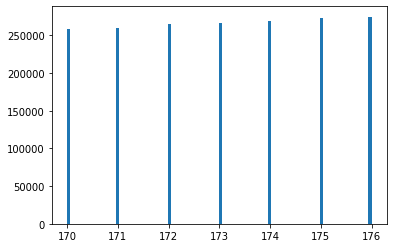

In [3]:
plt.hist(h5py_file['event_features/mt'][:], bins=100)
plt.show()

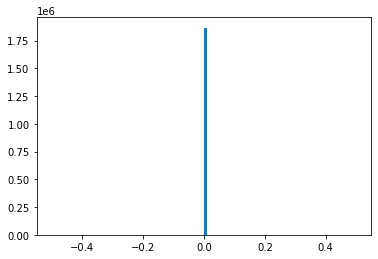

In [4]:
plt.hist(h5py_file['event_features/mx'][:], bins=100)
plt.show()

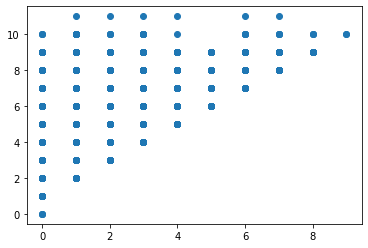

In [21]:
plt.scatter(h5py_file['spanet/right_target/q1'][:], h5py_file['spanet/right_target/q2'][:])
plt.show()

In [24]:
np.count_nonzero(h5py_file['spanet/right_target/q1'][:] == h5py_file['spanet/right_target/q2'][:])

3

In [84]:
dic = {}
dic['mt'] = h5py_file['event_features/mt'][:]

q1 = np.array([[i] for i in h5py_file['spanet/right_target/q1'][:]])
dic['q1_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], q1, axis=1).flatten()
dic['q1_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], q1, axis=1).flatten()
dic['q1_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], q1, axis=1).flatten()
dic['q1_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], q1, axis=1).flatten()

q2 = np.array([[i] for i in h5py_file['spanet/right_target/q2'][:]])
dic['q2_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], q2, axis=1).flatten()
dic['q2_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], q2, axis=1).flatten()
dic['q2_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], q2, axis=1).flatten()
dic['q2_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], q2, axis=1).flatten()

b = np.array([[i] for i in h5py_file['spanet/right_target/b'][:]])
dic['b_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], b, axis=1).flatten()
dic['b_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], b, axis=1).flatten()
dic['b_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], b, axis=1).flatten()
dic['b_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], b, axis=1).flatten()

In [85]:
dic['px1'] = dic['q1_pt']*np.cos(dic['q1_phi'])
dic['py1'] = dic['q1_pt']*np.sin(dic['q1_phi'])
dic['pz1'] = dic['q1_pt']*np.sinh(dic['q1_eta'])

dic['px2'] = dic['q2_pt']*np.cos(dic['q2_phi'])
dic['py2'] = dic['q2_pt']*np.sin(dic['q2_phi'])
dic['pz2'] = dic['q2_pt']*np.sinh(dic['q2_eta'])

dic['bx'] = dic['b_pt']*np.cos(dic['b_phi'])
dic['by'] = dic['b_pt']*np.sin(dic['b_phi'])
dic['bz'] = dic['b_pt']*np.sinh(dic['b_eta'])

# M = sqrt((m1+m2)**2 + (px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2)
dic['reconstructed_top_mass'] = np.sqrt((dic['q1_mass']+dic['q2_mass']+dic['b_mass'])**2
                 + (dic['px1']+dic['px2']+dic['bx'])**2
                 + (dic['py1']+dic['py2']+dic['by'])**2
                 + (dic['pz1']+dic['pz2']+dic['bz'])**2)

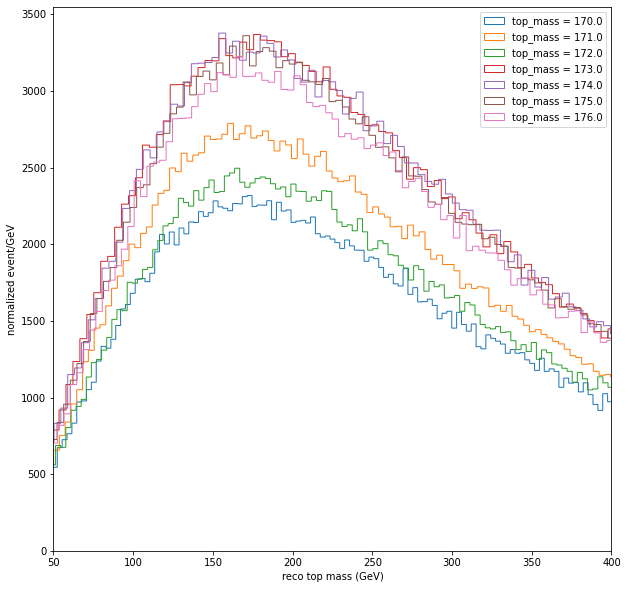

In [86]:
plt.figure(figsize=(7,7))
for top_mass in s:
    plt.hist(dic['reconstructed_top_mass'][dic['mt'] == top_mass],
    histtype='step', bins=1000, label='top_mass = ' + str(top_mass))
plt.xlim(50, 400)
plt.xlabel('reco top mass (GeV)')
plt.ylabel('normalized event/GeV')
plt.legend()
plt.show()

In [87]:
"""
cuts
130 < reco_m_top < 220
55 < reco_m_W < 110
0.3 < reco_R_bq < 3.0
"""

cut1 = np.logical_and(dic['reconstructed_top_mass'] < 220, dic['reconstructed_top_mass'] > 130)
# cut2 = np.logical_and(dic['reconstructed_W_mass'] < 110, dic['reconstructed_W_mass'] > 55)
# cut3 = np.logical_and(dic['reconstructed_R_bq'] < 3.0, dic['reconstructed_R_bq'] > 0.3)
cuts = cut1

In [88]:
# The number of events that pass through the cut.
# print('Events before cut: ', len(dic['klf_param8']))
# print('reco_m_top cut: ', np.count_nonzero(cut1))
# print('reco_m_W cut: ', np.count_nonzero(cut2))
# print('reco_R_bq cut: ', np.count_nonzero(cut3))
# print('cuts', np.count_nonzero(cuts))
for key in dic: dic[key] = dic[key][cuts]

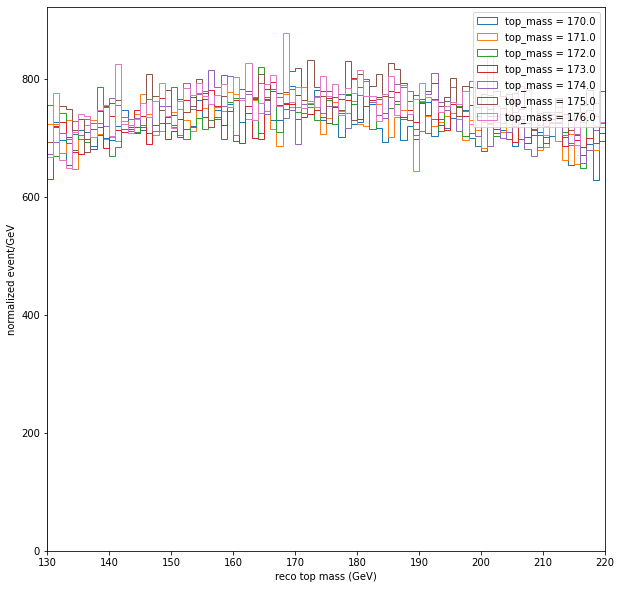

In [89]:
plt.figure(figsize=(10,10))
for top_mass in s:
    plt.hist(dic['reconstructed_top_mass'][dic['mt'] == top_mass],
    histtype='step', bins=90, label='top_mass = ' + str(top_mass))
plt.xlim(130, 220)
plt.xlabel('reco top mass (GeV)')
plt.ylabel('normalized event/GeV')
plt.legend()
plt.show()

In [146]:
def chi2(mt1, mt2): #mt1 is the observation, mt2 is the expected
    n1, bins1 = np.histogram(mt1)
    n2, bins2 = np.histogram(mt2)
    chi2_value = 2*sum([n1[i] - n2[i] + n2[i]*np.log(n2[i]/n1[i]) for i in range(len(n1))])
    plt.show()
    return chi2_value

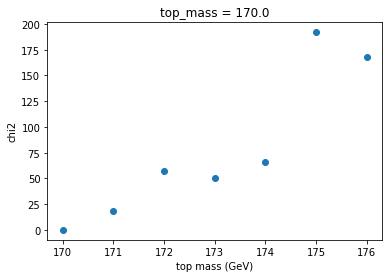

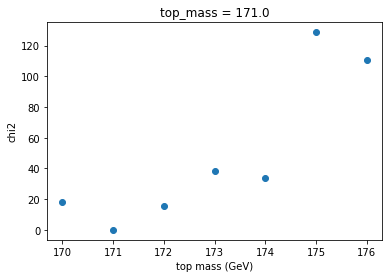

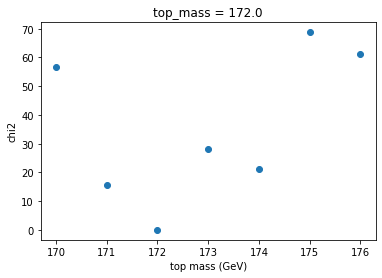

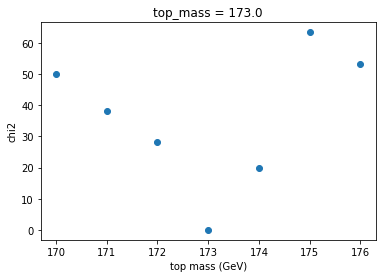

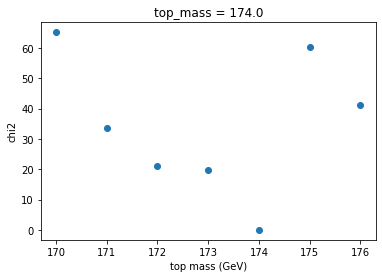

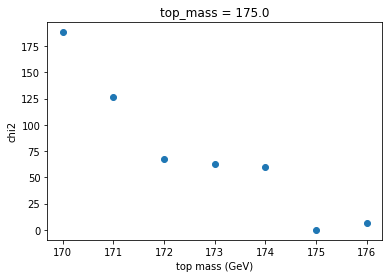

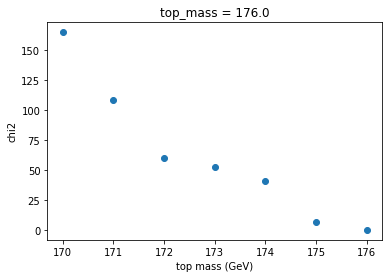

In [150]:
for top_mass1 in s:
    arr = []
    for top_mass2 in s:
        arr.append(chi2(dic['reconstructed_top_mass'][dic['mt'] == top_mass1],
                    dic['reconstructed_top_mass'][dic['mt'] == top_mass2]))
    plt.scatter(list(s), arr)
    plt.title('top_mass = ' + str(top_mass1))
    plt.xlabel('top mass (GeV)')
    plt.ylabel('chi2')
plt.show()
    